In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
dataset = load_digits()
X, y = dataset.data, dataset.target
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
np.bincount(y_binary_imbalanced)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)


clf = LogisticRegression().fit(X_train, y_train)
y_logreg_predicted = clf.predict(X_test)

print('Precision: {:.2f}'.format(precision_score(y_test, y_logreg_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_logreg_predicted)))

LRpre = format(precision_score(y_test, y_logreg_predicted))
LRrecall = format(recall_score(y_test, y_logreg_predicted))

Precision: 0.85
Recall: 0.81


C:\Users\Eunchae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
clf = SVC(kernel = 'linear').fit(X_train, y_train)
y_logreg_predicted = clf.predict(X_test)

print('Precision: {:.2f}'.format(precision_score(y_test, y_logreg_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_logreg_predicted)))

SVMpre = format(precision_score(y_test, y_logreg_predicted))
SVMrecall = format(recall_score(y_test, y_logreg_predicted))

Precision: 0.88
Recall: 0.88


In [11]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_logreg_predicted = clf.predict(X_test)

print('Precision: {:.2f}'.format(precision_score(y_test, y_logreg_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_logreg_predicted)))

DTpre = format(precision_score(y_test, y_logreg_predicted))
DTrecall = format(recall_score(y_test, y_logreg_predicted))


Precision: 0.86
Recall: 0.84
0.8571428571428571
0.8372093023255814


In [14]:
clf = RandomForestClassifier(max_features = 8, n_estimators = 10, random_state = 0).fit(X_train, y_train)
y_logreg_predicted = clf.predict(X_test)

print('Precision: {:.2f}'.format(precision_score(y_test, y_logreg_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_logreg_predicted)))

RFpre = format(precision_score(y_test, y_logreg_predicted))
RFrecall = format(recall_score(y_test, y_logreg_predicted))


Precision: 1.00
Recall: 0.84
0.8372093023255814


<IPython.core.display.Javascript object>


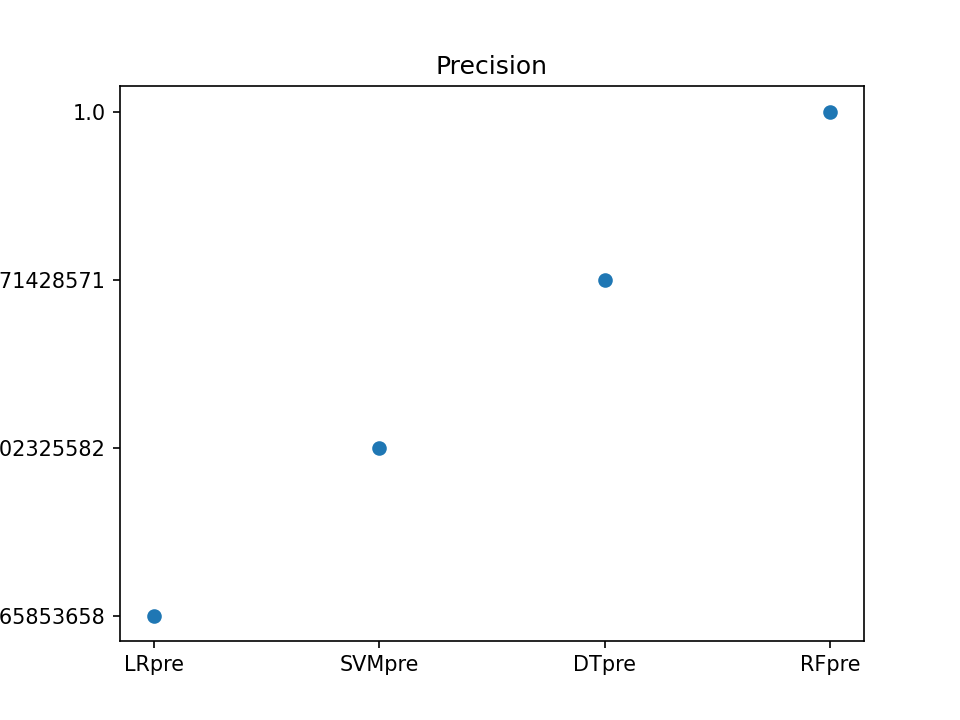

In [12]:
plt.figure()

x = np.arange(4)
premodel = ['LRpre', 'SVMpre', 'DTpre', 'RFpre']
prescore = [LRpre, SVMpre, DTpre, RFpre]
plt.title('Precision')
plt.scatter(premodel, prescore)
plt.show()

<IPython.core.display.Javascript object>


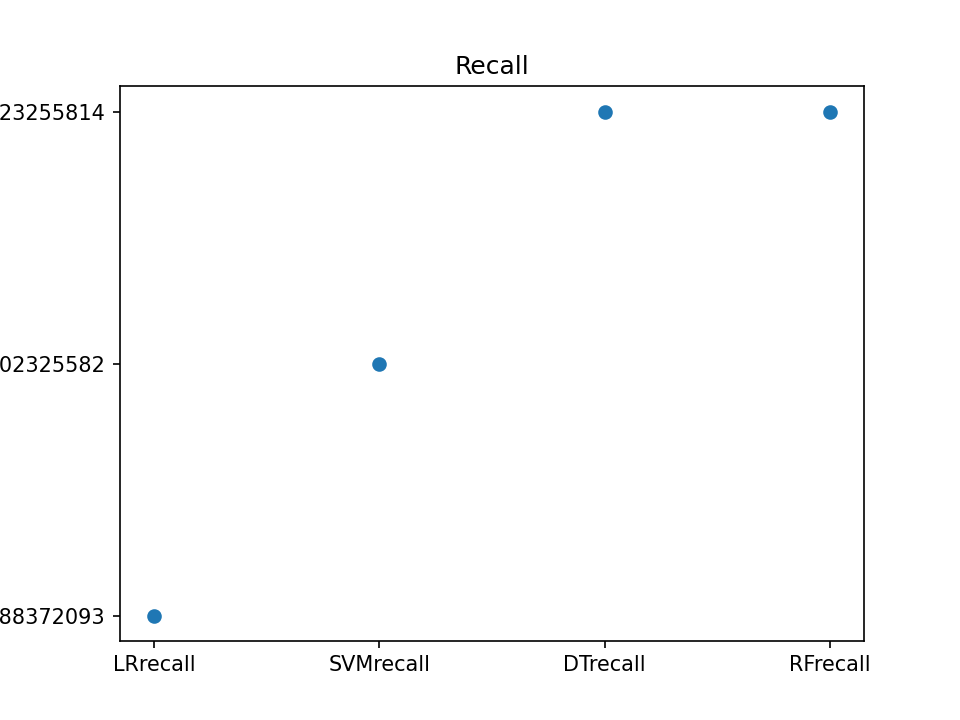

In [13]:
plt.figure()

x = np.arange(4)
remodel = ['LRrecall', 'SVMrecall', 'DTrecall', 'RFrecall']
rescore = [LRrecall, SVMrecall, DTrecall, RFrecall]
plt.title('Recall')
plt.scatter(remodel, rescore)
plt.show()

precision은 RF모델에서 정확도가 제일 높았고
recall은 SVM모델에서 정확도가 제일 높았다(그래프에는 표현이 잘 못 됨)